##### >
> # MaaSSim tutorial

 ### parallel simulations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
import seaborn as sns
import matplotlib.pyplot as plt
from dotmap import DotMap
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [3]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, collect_results  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate, simulate_parallel
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent

ModuleNotFoundError: No module named 'simpy'

In [4]:
params = get_config('../../data/config/delft.json')  # load configuration

In [5]:
params.paths.dumps = 'sd'
params.times.patience = 1200
params.simTime = 4
params.parallel.nThread = 4
params.parallel.nReplications = 10

In [6]:
inData = load_G(inData, params)  # load network graph 

In [7]:
space = DotMap()
space.nP = list(range(50,1001,50))
space.nV = list(range(20,201,20))
dict(space)

{'nP': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000],
 'nV': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}

simulate

In [8]:
simulate_parallel(params = params, search_space = space)

08-02-22 19:17:52-WARNING-Setting up 4h simulation at 2022-02-08 17:23:24 for 20 vehicles and 50 passengers in Delft, Netherlands
08-02-22 19:17:52-WARNING-Setting up 4h simulation at 2022-02-08 17:24:59 for 60 vehicles and 100 passengers in Delft, Netherlands
08-02-22 19:17:52-WARNING-Setting up 4h simulation at 2022-02-08 17:18:34 for 120 vehicles and 150 passengers in Delft, Netherlands
08-02-22 19:17:52-WARNING-Setting up 4h simulation at 2022-02-08 17:19:48 for 160 vehicles and 200 passengers in Delft, Netherlands
08-02-22 19:17:53-WARNING-simulation time 0.7 s
08-02-22 19:17:53-WARNING-assertion tests for simulation results - passed
-nP_50-nV_20-dt_20220208191752253764 2022-02-08 19:17:53.475449 end
08-02-22 19:17:53-WARNING-Setting up 4h simulation at 2022-02-08 17:21:37 for 20 vehicles and 50 passengers in Delft, Netherlands
08-02-22 19:17:54-WARNING-simulation time 1.5 s
08-02-22 19:17:54-WARNING-assertion tests for simulation results - passed
08-02-22 19:17:54-WARNING-simulat

### collect

demand structure

In [7]:
res = collect_results(params.paths.dumps)

In [8]:
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis['demand'] = veh_kpis.nP.astype(int)
veh_kpis['supply'] = veh_kpis.nV.astype(int)
veh_kpis['y'] = veh_kpis.IS_ACCEPTED_BY_TRAVELLER

/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2310457929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_kpis['demand'] = veh_kpis.nP.astype(int)
/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2310457929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_kpis['supply'] = veh_kpis.nV.astype(int)
/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2310457929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2893649550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_kpis['demand'] = veh_kpis.nP.astype(int) // 100 * 100
/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2893649550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_kpis['demand'] = veh_kpis.demand.apply(lambda x: 50 if x == 0 else x)
/var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/ipykernel_5016/2893649550.py:12: SettingWithCopyWarning: 
A value is trying

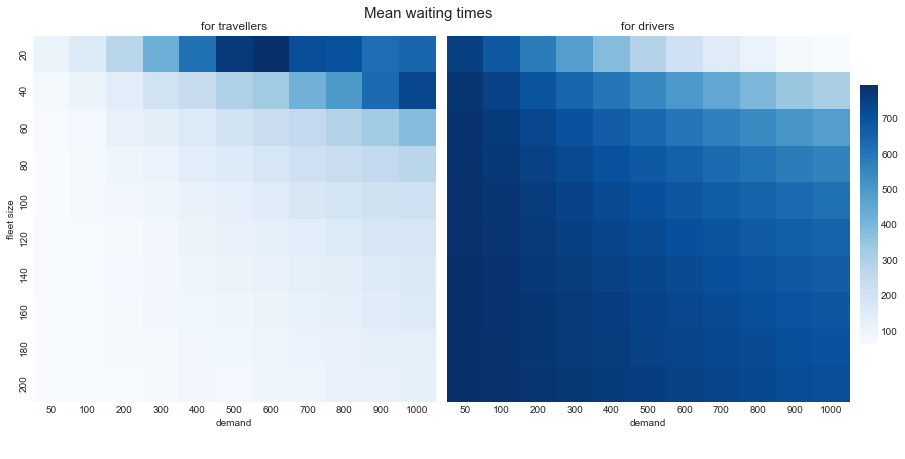

In [48]:
plt.rcParams["font.family"] = "Times"
plt.style.use('seaborn-whitegrid')
font = {'size'   : 10}

plt.rc('font', **font)
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey = True, sharex = True)
axes = axes.flatten()
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis['demand'] = veh_kpis.nP.astype(int) // 100 * 100
veh_kpis['demand'] = veh_kpis.demand.apply(lambda x: 50 if x == 0 else x)
veh_kpis['fleet size'] = veh_kpis.nV.astype(int) 
veh_kpis['y'] = 800-veh_kpis.IS_ACCEPTED_BY_TRAVELLER
veh_kpis = veh_kpis.groupby(['fleet size','demand'])['y'].mean().unstack()
#veh_kpis= veh_kpis.pivot(index = 'supply', columns = 'demand', values = 'y')
cbar_ax = fig.add_axes([1.0, .2, .02, .6])
sns.heatmap(veh_kpis, cmap="Blues", ax = axes[1], square = True, cbar = True, cbar_ax = cbar_ax)
pax_kpi = res.pax_kpi
pax_kpi = pax_kpi[pax_kpi['Unnamed: 0']== 'mean']
pax_kpi['demand'] = pax_kpi.nP.astype(int) // 100 * 100
pax_kpi['demand'] = pax_kpi.demand.apply(lambda x: 50 if x == 0 else x)
pax_kpi['fleet size'] = pax_kpi.nV.astype(int) 
pax_kpi['y'] = (pax_kpi.LOSES_PATIENCE/1000+pax_kpi.MEETS_DRIVER_AT_PICKUP)*pax_kpi.demand*3/pax_kpi['fleet size']
pax_kpi = pax_kpi.groupby(['fleet size','demand'])['y'].mean().unstack()
#pax_kpi= pax_kpi.pivot(index = 'supply', columns = 'demand', values = 'y')
handles, labels = axes[1].get_legend_handles_labels()
lgd = axes[1].legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))

sns.heatmap(pax_kpi, cmap="Blues", ax = axes[0], square = True, cbar = False)
pax_kpi.round(-1).astype(int)
plt.suptitle('Mean waiting times',  fontsize = 15)
axes[1].set_title('for drivers')
axes[1].set_ylabel('')
axes[0].set_title('for travellers')
plt.tight_layout()
plt.savefig('fig5.tif', dpi = 300, bbox_extra_artists=(lgd,lgd), bbox_inches='tight')

In [ ]:
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl